In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import chart_studio.plotly as py
from plotly.graph_objects import Layout

In [2]:
import chart_studio
chart_studio.tools.set_credentials_file(username='kmohan_ts', api_key='DQQyWqXWsC1Cma8ld4Ud')

In [4]:
energy_data = pd.read_csv('~/Documents/Projects/covid-energy-burden/energy_data_with_predictions_new.csv')

In [5]:
energy_data.columns

Index(['Unnamed: 0', 'date', 'month', 'sales_mkwh', 'state', 'sector',
       'consumers', 'price', 'revenue', 'use_per_capita', 'region',
       'cooling_days', 'heating_days', 'COM', 'RES', 'time', 'year', 'mon',
       'season', 'num_days', 'num_hols', 'pct_weekdays', 'hot', 'cold', 'wind',
       'y', 'yhat', 'yhat_upper', 'yhat_lower', 'predicted_use',
       'yhat_extreme', 'pct_error', 'pct_error_x', 'pct_error_abs', 'MSE',
       'RMSE'],
      dtype='object')

In [6]:
energy_data.head()

,Unnamed: 0,date,month,sales_mkwh,state,sector,consumers,price,revenue,use_per_capita,...,yhat,yhat_upper,yhat_lower,predicted_use,yhat_extreme,pct_error,pct_error_x,pct_error_abs,MSE,RMSE
0,1,2020-12-01,202012,2992.76542,AL,RES,2326166.0,11.39,34087.598134,1286.565714,...,41.524989,45.128825,37.689929,2.994415e+09,37.689929,-0.055104,9.185533,0.055104,0.000523,0.022869
1,2,2020-11-01,202011,2056.87325,AL,RES,2324212.0,12.99,26718.783518,884.976607,...,28.513945,31.935801,24.925139,1.988174e+09,31.935801,3.340004,-8.259815,3.340004,0.970767,0.985275
2,3,2020-10-01,202010,2150.98005,AL,RES,2326554.0,13.17,28328.407259,924.534763,...,31.124199,34.754811,27.205621,2.244776e+09,27.205621,-4.360615,8.778524,4.360615,1.691292,1.300497
3,4,2020-09-01,202009,2876.36566,AL,RES,2325509.0,13.18,37910.499399,1236.875738,...,42.644634,46.582426,38.520784,2.975114e+09,38.520784,-3.433109,6.569151,3.433109,2.003479,1.415443
4,5,2020-08-01,202008,3568.63790,AL,RES,2322835.0,12.75,45500.133225,1536.328624,...,49.643776,53.362903,45.970742,3.574743e+09,45.970742,-0.171085,7.240353,0.171085,0.007189,0.084788


In [53]:
def mean_errors(df, col='pct_error'):
    pre_covid = df[(df.date<'2020-03-01')&(df.date >= '2019-01-01')][col].mean()
    post_covid = df[df.date>='2020-03-01'][col].mean()
    diff = post_covid - pre_covid
    return diff
#     return {'pre_covid':pre_covid, 'post_covid':post_covid}

def max_errors(df, col='pct_error'):
    pre_covid = df[(df.date<'2020-03-01')&(df.date >= '2019-01-01')][col].mean()
    post_covid = df[df.date>='2020-03-01'][col].max()
    diff = post_covid - pre_covid
    return diff

def get_pre_covid_errors(df, col='pct_error'):
    pre_covid = df[(df.date<'2020-03-01')&(df.date >= '2019-01-01')][col].mean()
    return pre_covid

def get_post_covid_errors(df, col='pct_error'):
    post_covid = df[df.date>='2020-03-01'][col].mean()
    return post_covid

In [11]:
pre_covid_error = energy_data.groupby(['state','sector']).apply(get_pre_covid_errors).reset_index().rename(columns={0:'pre_covid_error'})
post_covid_error = energy_data.groupby(['state','sector']).apply(get_post_covid_errors).reset_index().rename(columns={0:'post_covid_error'})

In [12]:
pre_post_error = pre_covid_error.merge(post_covid_error,on=['state','sector'])

In [13]:
energy_data = energy_data.merge(pre_post_error,on=['state','sector'])

In [14]:
energy_data['pre_post_diff'] = energy_data['post_covid_error'] - energy_data['pre_covid_error']

In [15]:
energy_data['anno_text'] = ['<b>+'+str(np.round(x,2))+'%</b>' if x>0 else '<b>'+str(np.round(x,2))+'%</b>' for x in energy_data['pre_post_diff']]
energy_data['anno_color'] = ['green' if x>0 else 'red' for x in energy_data['pre_post_diff']]

In [16]:
list(energy_data[(energy_data.state=='AZ')&(energy_data.sector=="RES")].anno_color)[0]

'green'

In [17]:
states = energy_data[~(energy_data.state =='USA')].state.unique()

In [18]:
states = ['USA']

In [19]:
states.extend(energy_data[~(energy_data.state =='USA')].state.unique())

In [21]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'USA':'USA'
}

# thank you to @kinghelix and @trevormarburger for this idea
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [22]:
energy_data['state_name'] = [abbrev_us_state[s] for s in energy_data['state']]

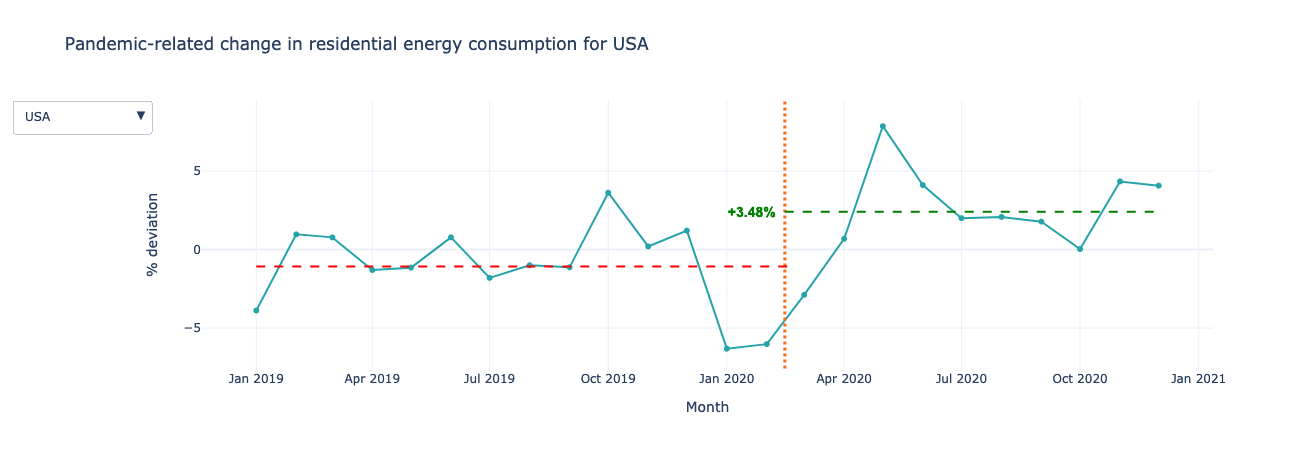

'https://plotly.com/~kmohan_ts/3/'

In [70]:
# fig = px.line(energy_data[(energy_data.state=='USA')&(energy_data.sector=="RES")&(energy_data.year >= 2019)], x="date", y="pct_error_20", title='Error in prediction')
# fig.add_shape(type='line',x0='2020-02-15',x1='2020-02-15')

# # fig = go.Figure(go.Scatter(x=energy_data[(energy_data.state=='USA')&(energy_data.sector=="RES")&(energy_data.year >= 2019)].date,
# #                            y=np.round(energy_data[(energy_data.state=='USA')&(energy_data.sector=="RES")&(energy_data.year >= 2019)].pct_error_20,2),mode='lines+markers',marker_color='#27a3aa'))
layout = Layout(title="Pandemic-related change in residential energy consumption for USA",xaxis=dict(title="Month"),yaxis=dict(title="% deviation"),template='plotly_white')
fig = go.Figure(layout=layout)
fig.add_trace(go.Scatter(x=energy_data[(energy_data.state_name=='USA')&(energy_data.sector=="RES")&(energy_data.year >= 2019)].date,
                         y=np.round(energy_data[(energy_data.state_name=='USA')&(energy_data.sector=="RES")&(energy_data.year >= 2019)].pct_error,2),
                         mode='lines+markers',marker_color='#27a3aa',visible=True))
# fig = px.scatter(energy_data[(energy_data.state=='USA')&(energy_data.sector=="RES")&(energy_data.year >= 2019)],
#                 x='date',
#                 y='pct_error_20'
#                 )
fig.add_shape(type='line',
              x0='2020-02-15',x1='2020-02-15',
              y0=energy_data[(energy_data.state_name=='USA')&(energy_data.sector=="RES")&(energy_data.year >= 2019)].pct_error.min()*1.2,
              y1=energy_data[(energy_data.state_name=='USA')&(energy_data.sector=="RES")&(energy_data.year >= 2019)].pct_error.max()*1.2,
              line=dict(color='#f76d23', width=3, dash="dot"))
fig.add_shape(type='line',
              x0='2019-01-01',x1='2020-02-18',
              y0=energy_data[(energy_data.state_name=='USA')&(energy_data.sector=="RES")].pre_covid_error.min(),
              y1=energy_data[(energy_data.state_name=='USA')&(energy_data.sector=="RES")].pre_covid_error.min(),
              line=dict(color='red', width=2, dash="dash"))
fig.add_shape(type='line',
              x0='2020-02-15',x1='2020-12-01',
              y0=energy_data[(energy_data.state_name=='USA')&(energy_data.sector=="RES")].post_covid_error.min(),
              y1=energy_data[(energy_data.state_name=='USA')&(energy_data.sector=="RES")].post_covid_error.min(),
              line=dict(color='green', width=2, dash="dash"))
fig.add_annotation(x='2020-01-20',
                  y=energy_data[(energy_data.state_name=='USA')&(energy_data.sector=="RES")].post_covid_error.min(),
                  text=list(energy_data[(energy_data.state_name=='USA')&(energy_data.sector=="RES")].anno_text)[0],
                  showarrow=False,
                  font_size=14,
                  font_family='Arial',
                  font_color=list(energy_data[(energy_data.state_name=='USA')&(energy_data.sector=="RES")].anno_color)[0] 
                  )

updatemenu = []
buttons = []
states = ['USA']
states.extend(energy_data[~(energy_data.state_name =='USA')].state_name.unique())

for state in states:
    buttons.append(dict(method='update',
                        label=state,
                        visible=True,
                        args=[#update to trace
                            {'y':[np.round(energy_data[(energy_data.state_name==state)&(energy_data.sector=="RES")&(energy_data.year >= 2019)].pct_error,2)],
                               'x':[energy_data[(energy_data.state_name==state)&(energy_data.sector=="RES")&(energy_data.year >= 2019)].date],
                               'type':'scatter'},
                            #update to layout
                            {'title':'Pandemic-related change in residential energy consumption for '+state,
                             'annotations':[{'x':'2020-01-20',
                                             'y':energy_data[(energy_data.state_name==state)&(energy_data.sector=="RES")].post_covid_error.min(),
                                             'text':list(energy_data[(energy_data.state_name==state)&(energy_data.sector=="RES")].anno_text)[0],
                                             'showarrow':False,'font_size':14,'font_family':'Arial',
                                             'font_color':list(energy_data[(energy_data.state_name==state)&(energy_data.sector=="RES")].anno_color)[0] }],
                            'shapes':[{'type':'line',
                                       'x0':'2019-01-01','x1':'2020-02-18',
                                       'y0':energy_data[(energy_data.state_name==state)&(energy_data.sector=="RES")].pre_covid_error.min(),
                                       'y1':energy_data[(energy_data.state_name==state)&(energy_data.sector=="RES")].pre_covid_error.min(),
                                       'line':dict(color='red', width=2, dash="dash")},
                                     {'type':'line',
                                       'x0':'2020-02-15','x1':'2020-12-01',
                                       'y0':energy_data[(energy_data.state_name==state)&(energy_data.sector=="RES")].post_covid_error.min(),
                                       'y1':energy_data[(energy_data.state_name==state)&(energy_data.sector=="RES")].post_covid_error.min(),
                                       'line':dict(color='green', width=2, dash="dash")},
                                     {'type':'line',
                                       'x0':'2020-02-15','x1':'2020-02-15',
                                       'y0':energy_data[(energy_data.state_name==state)&(energy_data.sector=="RES")&(energy_data.year >= 2019)].pct_error.min()*1.2,
                                       'y1':energy_data[(energy_data.state_name==state)&(energy_data.sector=="RES")&(energy_data.year >= 2019)].pct_error.max()*1.2,
                                       'line':dict(color='#f76d23', width=3, dash="dot")}]},
                            [0]]))

    # some adjustments to the updatemenus
updatemenu = []
your_menu = dict()
updatemenu.append(your_menu)

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True

# add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=updatemenu,xaxis=dict(title="Month"),yaxis=dict(title="% deviation"),template='plotly_white')
fig.show()

py.plot(fig, filename = 'res-energy-states', auto_open=False)

In [52]:
energy_data.head()

,Unnamed: 0,date,month,sales_mkwh,state,sector,consumers,price,revenue,use_per_capita,...,pct_error_x,pct_error_abs,MSE,RMSE,pre_covid_error,post_covid_error,pre_post_diff,anno_text,anno_color,state_name
0,1,2020-12-01,202012,2992.76542,AL,RES,2326166.0,11.39,34087.598134,1286.565714,...,9.185533,0.055104,0.000523,0.022869,-1.677008,-1.854674,-0.177665,<b>-0.18%</b>,red,Alabama
1,2,2020-11-01,202011,2056.87325,AL,RES,2324212.0,12.99,26718.783518,884.976607,...,-8.259815,3.340004,0.970767,0.985275,-1.677008,-1.854674,-0.177665,<b>-0.18%</b>,red,Alabama
2,3,2020-10-01,202010,2150.98005,AL,RES,2326554.0,13.17,28328.407259,924.534763,...,8.778524,4.360615,1.691292,1.300497,-1.677008,-1.854674,-0.177665,<b>-0.18%</b>,red,Alabama
3,4,2020-09-01,202009,2876.36566,AL,RES,2325509.0,13.18,37910.499399,1236.875738,...,6.569151,3.433109,2.003479,1.415443,-1.677008,-1.854674,-0.177665,<b>-0.18%</b>,red,Alabama
4,5,2020-08-01,202008,3568.63790,AL,RES,2322835.0,12.75,45500.133225,1536.328624,...,7.240353,0.171085,0.007189,0.084788,-1.677008,-1.854674,-0.177665,<b>-0.18%</b>,red,Alabama


### Geo plot

In [153]:
mean_change = pd.DataFrame(energy_data.groupby(['state','sector']).apply(mean_errors).reset_index().rename(columns={0:'mean_change'}))
max_change = pd.DataFrame(energy_data.groupby(['state','sector']).apply(max_errors).reset_index().rename(columns={0:'max_change'}))

In [154]:
mean_res_change = mean_change[mean_change.sector=="RES"]
max_res_change = max_change[max_change.sector=="RES"]

In [155]:
state_stats = mean_res_change.merge(max_res_change,how='left',on=['state','sector'])

In [156]:
state_stats['state_name'] = [abbrev_us_state[s] for s in state_stats['state']]

In [157]:
state_stats.head()

,state,sector,mean_change,max_change,state_name
0,AL,RES,-0.177665,5.017012,Alabama
1,AR,RES,-1.726521,4.773621,Arkansas
2,AZ,RES,5.809163,12.371890,Arizona
3,CA,RES,5.258897,15.970264,California
4,CO,RES,5.232920,12.979855,Colorado


In [158]:
np.mean(energy_data[energy_data.sector=='RES'].y*energy_data[energy_data.sector=='RES'].num_days*energy_data[energy_data.sector=='RES'].price/100)

108.23729429673541

In [159]:
state_stats = state_stats.merge(energy_data[energy_data.date>'2020-02-01'].groupby(['state','region']).mean()['consumers'].reset_index(),how='left',on='state')

In [162]:
state_stats.groupby('region').mean().sort_values('mean_change')

,mean_change,max_change,consumers
region,,,
ESC,0.243045,6.431157,1.271240e+06
WSC,0.565206,6.959518,2.374049e+06
WNC,2.142803,7.449251,8.032823e+05
SAC,2.568542,11.741856,2.028055e+06
PAC,2.991841,9.420692,3.535585e+06
USA,3.481183,8.931848,7.745033e+07
MTN,4.276451,11.208027,7.242034e+05
ENC,5.650108,13.009363,2.313611e+06
MAC,6.940570,11.923559,3.121797e+06


In [160]:
state_stats.sort_values('mean_change',ascending=False)

,state,sector,mean_change,max_change,state_name,region,consumers
19,MI,RES,10.379891,18.217173,Michigan,ENC,2507411.20
30,NV,RES,9.690459,20.447971,Nevada,MTN,697792.25
16,MA,RES,9.208953,13.935072,Massachusetts,NEC,1627766.80
31,NY,RES,8.810486,12.289374,New York,MAC,4194269.85
27,NH,RES,8.630757,16.232729,New Hampshire,NEC,371918.95
36,RI,RES,8.305739,19.224532,Rhode Island,NEC,250485.00
46,WI,RES,7.126879,12.082035,Wisconsin,ENC,1567156.70
28,NJ,RES,6.772640,12.766474,New Jersey,MAC,2076429.50
5,CT,RES,6.673223,16.352585,Connecticut,NEC,839361.20
20,MN,RES,6.433727,10.372165,Minnesota,WNC,1383926.05


In [144]:
state_stats = state_stats[state_stats.state!='USA']

In [147]:
sum(state_stats.mean_change*state_stats.consumers)/sum(state_stats.consumers)

3.9917490254115617

In [114]:
cost_increase = energy_data[(energy_data.date>'2020-02-01')&(energy_data.sector=='RES')][['date','state','price','pct_error','num_days','yhat','y','consumers']].copy()
cost_increase['cost_increase'] = (cost_increase.y-cost_increase.yhat)*cost_increase.num_days*cost_increase.price/100
cost_increase = cost_increase.groupby(['state']).sum()
cost_increase.consumers = cost_increase.consumers/10
sum(cost_increase.consumers*cost_increase.cost_increase)/sum(cost_increase.consumers)
# cost_increase.head()

31.49778204968343

In [142]:
state_stats['text'] = [s + '<br>' + 
                       'Avg. change: ' + str(np.round(c,2)) + '%' + '<br>' +
                       'Peak change: ' + str(np.round(m,2)) + '%' + '<br>' 
                       for s,c,m in zip(state_stats['state_name'],state_stats['mean_change'],state_stats['max_change'])]

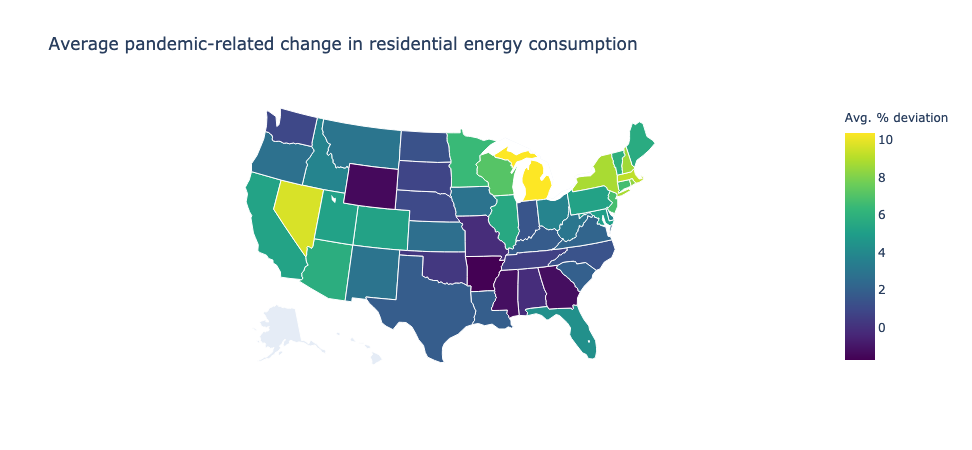

'https://plotly.com/~kmohan_ts/1/'

In [106]:
fig = go.Figure(data=go.Choropleth(
    locations=state_stats['state'], # Spatial coordinates
    z = state_stats['mean_change'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'viridis',
    text=state_stats['text'],
    colorbar_title = "Avg. % deviation",
    marker_line_color='white', # line markers between states
    hoverinfo = "text"
))

fig.update_layout(
    title_text = 'Average pandemic-related change in residential energy consumption',
    geo_scope='usa', # limit map scope to USA
    geo= dict(projection=go.layout.geo.Projection(type = 'albers usa'))
)

fig.show()

py.plot(fig, filename = 'res-energy-geo', auto_open=False)